In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.duplicated().sum()

0

In [5]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype(int)
data['tenure'] = data['tenure'].astype(int)



In [6]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", 0).astype(float)

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["Churn"] = le.fit_transform(data['Churn'])
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Task A

In [8]:
a = sum(data['gender']=="Male") 

print(f" total number of male customers {a}")

 total number of male customers 3555


In [9]:
b =sum(data['InternetService']=="DSL") 
print(f"total number of customers whose Internet Service is ‘DSL’ {b}")

total number of customers whose Internet Service is ‘DSL’ 2421


In [10]:
new_customer=data[(data['gender']=='Female') & 
(data['SeniorCitizen']==1) & (data['PaymentMethod']=='Mailed check')] 

new_customer.head() 

#  all the female senior citizens whose payment method is ‘Mailed check’


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,1
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.70,1
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,0
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.40,0
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.60,0


In [11]:
new_customer = data[(data['tenure'] < 10) | (data['TotalCharges']< 500)]

new_customer.head() 

# With this command, you can extract all those records where either the tenure is less than 10 or Total charges is less  than 500.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0


In [12]:
new_customer=data[(data['tenure']<10) | (data['TotalCharges']<500)] 
new_customer.head()

#all those records where either the tenure is less than  10 or Total charges is less  than 500.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0


## Task B

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


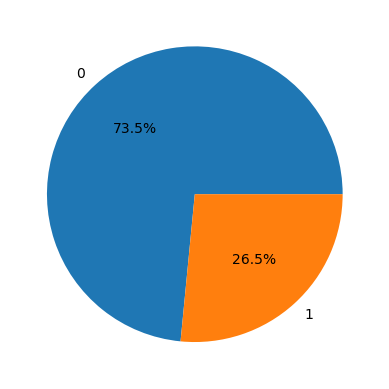

In [14]:
#PIE chart

names = data["Churn"].value_counts().keys().tolist() 
sizes=  data["Churn"].value_counts().tolist() 

plt.pie(sizes,labels=names,autopct="%0.1f%%") 
plt.show() 



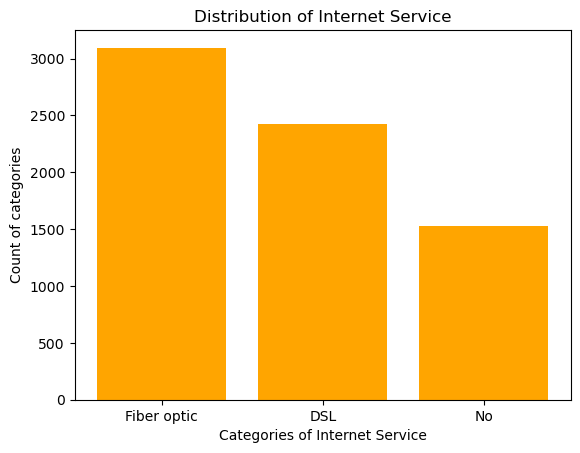

In [15]:
plt.bar(data['InternetService'].value_counts().keys().tolist(),data['InternetService'].value_counts().tolist(),color='orange') 
plt.xlabel('Categories of Internet Service') 
plt.ylabel('Count of categories') 
plt.title('Distribution of Internet Service') 
plt.show() 


## Task C


In [16]:
from sklearn.model_selection import train_test_split 

x=data[['tenure']] 

y=data[['Churn']] 


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [17]:
from keras.models import Sequential 
from keras.layers import Dense  , Dropout


model = Sequential() 
model.add(Dense(12, input_dim=1, activation='relu')) 
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 

c:\Users\ashis\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [19]:
model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test) , batch_size = 100) 

Epoch 1/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.2626 - loss: 8.5364 - val_accuracy: 0.2731 - val_loss: 4.9812
Epoch 2/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2641 - loss: 3.5858 - val_accuracy: 0.7283 - val_loss: 0.5379
Epoch 3/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7443 - loss: 0.5172 - val_accuracy: 0.7283 - val_loss: 0.5164
Epoch 4/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7270 - loss: 0.5273 - val_accuracy: 0.7283 - val_loss: 0.5150
Epoch 5/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7291 - loss: 0.5241 - val_accuracy: 0.7283 - val_loss: 0.5148
Epoch 6/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7327 - loss: 0.5227 - val_accuracy: 0.7283 - val_loss: 0.5146
Epoch 7/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7296 - loss: 0.5215 - val_accuracy: 0.7283 - val_loss: 0.5144
Epoch 8/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7417 - loss: 0.5137 - val_accuracy: 0.7283 -

In [20]:
model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

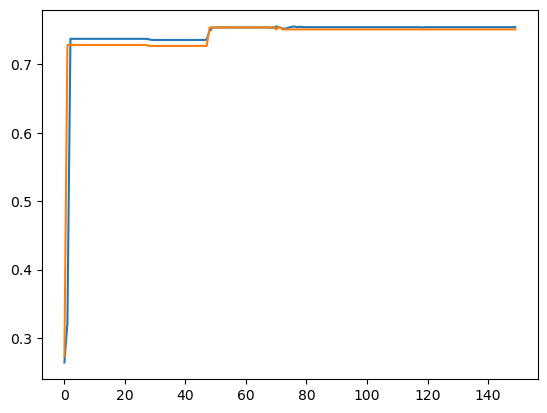

In [21]:

acc = model.history.history['accuracy']
from matplotlib import pyplot as plt 
plt.plot(acc) 
plt.plot(model.history.history['val_accuracy']) 
plt.show()

In [22]:
import numpy as np 
mean_acc = np.mean(model.history.history['val_accuracy'])

print(f"the mean accuracy comes out to be : {mean_acc}")

the mean accuracy comes out to be : 0.7410190868377685


In [ ]:
from sklearn.metrics import confusion_matrix 

y_pred = (model.predict(x_test) > 0.5).astype("int32")
confusion_matrix(y_test,y_pred)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[1392,  147],
       [ 379,  195]], dtype=int64)

## Model b

In [ ]:
#model b
from tensorflow.keras.layers import Dropout

model2 = Sequential() 
model2.add(Dense(12, input_dim=1, activation='relu')) 
model2.add(Dropout(0.3)) 
model2.add(Dense(8, activation='relu')) 
model2.add(Dropout(0.2)) 
model2.add(Dense(1, activation='sigmoid'))

c:\Users\ashis\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

model2.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test)) 


Epoch 1/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7204 - loss: 1.8687 - val_accuracy: 0.7463 - val_loss: 0.5141
Epoch 2/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6983 - loss: 0.8524 - val_accuracy: 0.7354 - val_loss: 0.5536
Epoch 3/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7138 - loss: 0.6928 - val_accuracy: 0.7397 - val_loss: 0.5503
Epoch 4/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7126 - loss: 0.5952 - val_accuracy: 0.7425 - val_loss: 0.5532
Epoch 5/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7315 - loss: 0.5764 - val_accuracy: 0.7459 - val_loss: 0.5540
Epoch 6/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7292 - loss: 0.5705 - val_accuracy: 0.7539 - val_loss: 0.5340
Epoch 7/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7233 - loss: 0.5607 - val_accuracy: 0.7283 - val_loss: 0.5515
Epoch 8/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7322 - loss: 0.5471 - val_accu

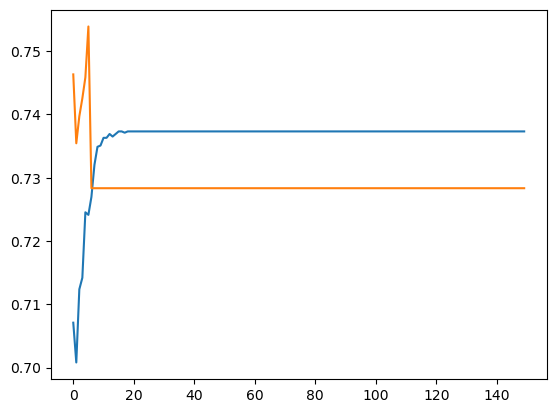

In [26]:
from matplotlib import pyplot as plt 
plt.plot(model2.history.history['accuracy']) 
plt.plot(model2.history.history['val_accuracy']) 
plt.show()

In [27]:
import numpy as np 
np.mean(model2.history.history['val_accuracy'])

0.7289730191230774

In [28]:

from sklearn.metrics import confusion_matrix 
y_pred = (model2.predict(x_test) > 0.5).astype("int32")
confusion_matrix(y_test,y_pred)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[1539,    0],
       [ 574,    0]], dtype=int64)

## model c

In [29]:
##  model c

x=data[['MonthlyCharges','tenure','TotalCharges']]#Features 
y=data[['Churn']]#Target 

In [30]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42) 


In [31]:

model3 = Sequential() 
model3.add(Dense(12, input_dim=3, activation='relu')) 
model3.add(Dense(8, activation='relu')) 
model3.add(Dense(1, activation='sigmoid')) 
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

model3.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test)) 


Epoch 1/150


c:\Users\ashis\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2786 - loss: 277.4715 - val_accuracy: 0.6995 - val_loss: 0.6939
Epoch 2/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7393 - loss: 0.7596 - val_accuracy: 0.6678 - val_loss: 0.6050
Epoch 3/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7329 - loss: 0.6673 - val_accuracy: 0.7752 - val_loss: 0.8996
Epoch 4/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7645 - loss: 0.6205 - val_accuracy: 0.7790 - val_loss: 0.6683
Epoch 5/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7547 - loss: 0.5980 - val_accuracy: 0.7856 - val_loss: 0.4977
Epoch 6/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7698 - loss: 0.5043 - val_accuracy: 0.7804 - val_loss: 0.6030
Epoch 7/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7773 - loss: 0.5409 - val_accuracy: 0.7861 - val_loss: 0.5148
Epoch 8/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7630 - loss: 0.5508 - val_accuracy: 0.77

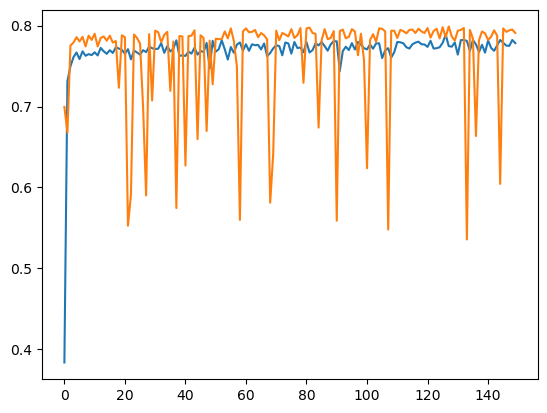

In [32]:

from matplotlib import pyplot as plt 
plt.plot(model3.history.history['accuracy']) 
plt.plot(model3.history.history['val_accuracy']) 
plt.show()

In [33]:
import numpy as np 
np.mean(model3.history.history['val_accuracy']) 

0.7628427271048228

In [34]:
y_pred = (model3.predict(x_test) > 0.5).astype("int32")
confusion_matrix(y_test,y_pred)
 

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[1464,   75],
       [ 367,  207]], dtype=int64)